# Additional area statistics
Aside from the separate "most_common" regridder, a more generic statistical reductions are also available.

A demo of this is shown below, based on the [Multi-Scale Ultra High Resolution (MUR) Sea Surface Temperature (SST) dataset](https://registry.opendata.aws/mur/).

For optimal memory management we want to make use of Dask's distributed client:

In [1]:
from dask import distributed

c = distributed.Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.33 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44181,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.33 GiB
Comm: tcp://127.0.0.1:38217,Total threads: 2
Dashboard: http://127.0.0.1:46731/status,Memory: 3.83 GiB
Nanny: tcp://127.0.0.1:38577,


The original dataset is of a very high resolution. We will focus on a smaller slice of the globe, and display the original data for reference:

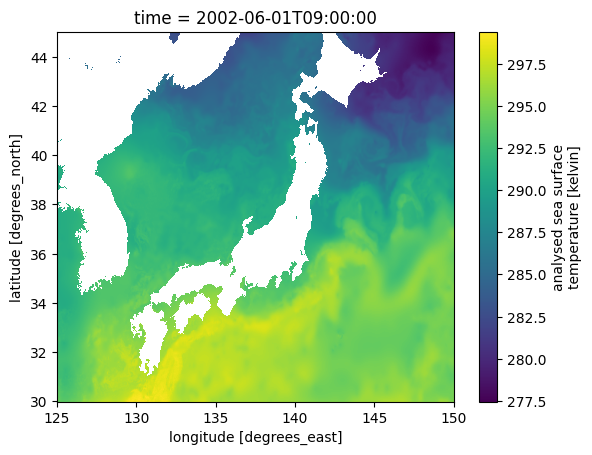

In [3]:
import xarray as xr
import xarray_regrid

sst = xr.open_zarr("https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1")["analysed_sst"]

# Reduce size of array by only selecting a slice
sst = sst.sel(lat=slice(30, 45), lon=slice(125, 150)).isel(time=0)

sst.plot()

To regrid we define a new target grid, with a lower resolution.

In [4]:
target = xarray_regrid.Grid(
    north=45,
    south=30,
    west=125,
    east=150,
    resolution_lat=1,
    resolution_lon=1,
).create_regridding_dataset(lat_name="lat", lon_name="lon")

We will take the variance of the data. Note that this operation is lazy when the data consists of dask arrays.

In [5]:
sst_var = sst.regrid.stat(target, method="var", time_dim="time", skipna=False)

When we plot the DataArray, the data is retrieved and the result computed.

Other methods are available, such as "sum", "mean", "std", "median", "min", and "max".

/home/bart/micromamba/envs/xarray_regrid_3.12/lib/python3.12/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 28.65 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


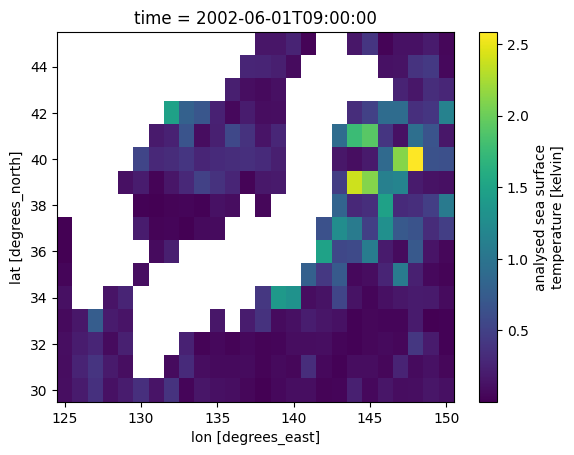

In [6]:
sst_var.plot()